In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('/Users/justinsheng/Library/CloudStorage/OneDrive-UniversityofToronto/Justin/Schulich_2023-2024/MBAN6110/midterm_data.csv')

In [4]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [6]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [71]:
df.drop(df[df['device'].isnull() ].index, axis=0, inplace=True)
df.drop(df[df['location'].isnull() ].index, axis=0, inplace=True)
df.drop('userID', axis=1, inplace=True)
df.drop('sessions', axis=1, inplace=True)

In [72]:
df.describe(include='all')

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4853.00000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000,4853,4853
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,2512,1024
mean,41.55883,25.123864,5.773336,14.943746,148.806744,0.274469,NaN,NaN
std,14.04737,9.651918,2.562438,6.042370,67.842873,0.446292,NaN,NaN
min,18.00000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,29.00000,18.290950,4.000000,10.000000,92.370000,0.000000,NaN,NaN
50%,42.00000,25.053720,6.000000,15.000000,142.690000,0.000000,NaN,NaN
75%,54.00000,31.981274,8.000000,20.000000,197.880000,1.000000,NaN,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4853 non-null   int64  
 1   time_spent       4853 non-null   float64
 2   pages_visited    4853 non-null   int64  
 3   cart_items       4853 non-null   int64  
 4   cart_value       4853 non-null   float64
 5   checkout_status  4853 non-null   int64  
 6   device           4853 non-null   object 
 7   location         4853 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 341.2+ KB


<Axes: ylabel='pages_visited'>

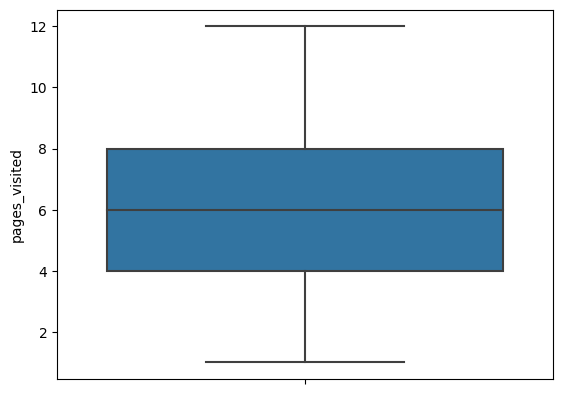

In [74]:
sns.boxplot(data = df, y='pages_visited')

<Axes: ylabel='time_spent'>

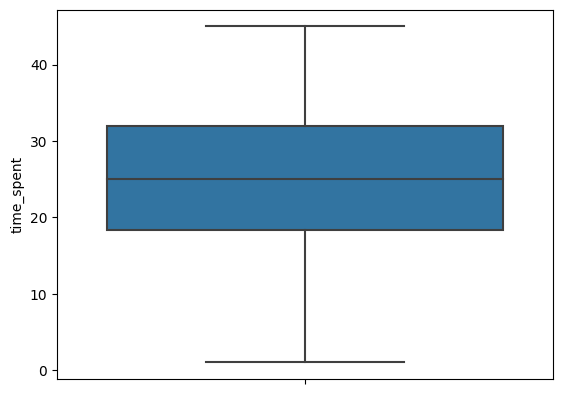

In [75]:
sns.boxplot(data = df, y='time_spent')

In [27]:
drop_time_outliers = df[df['time_spent']>60].index
drop_time_outliers
df.drop(drop_time_outliers, inplace=True)

<Axes: ylabel='cart_items'>

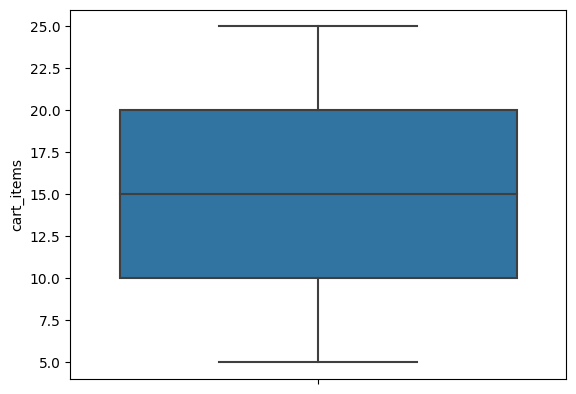

In [28]:
sns.boxplot(data = df, y='cart_items')

<Axes: ylabel='cart_value'>

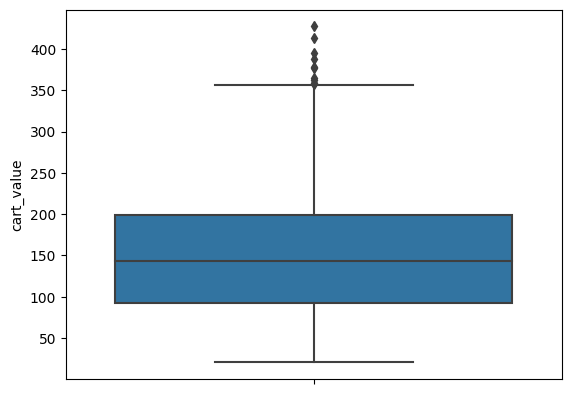

In [29]:
sns.boxplot(data = df, y='cart_value')

In [30]:
drop_value_outliers = df[df['cart_value']>350].index
drop_value_outliers
df.drop(drop_value_outliers, inplace=True)

<Axes: ylabel='cart_value'>

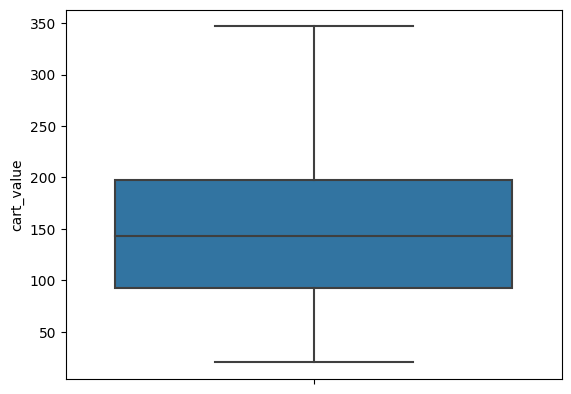

In [31]:
sns.boxplot(data = df, y='cart_value')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4853 non-null   int64  
 1   sessions         4853 non-null   int64  
 2   time_spent       4853 non-null   float64
 3   pages_visited    4853 non-null   int64  
 4   cart_items       4853 non-null   int64  
 5   cart_value       4853 non-null   float64
 6   checkout_status  4853 non-null   int64  
 7   device           4853 non-null   object 
 8   location         4853 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 379.1+ KB


In [33]:
df.drop_duplicates(inplace=True)

In [50]:
df.describe()

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4853.00000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000,4853.000000
mean,41.55883,5.024109,25.123864,5.773336,14.943746,148.806744,0.274469
std,14.04737,2.591133,9.651918,2.562438,6.042370,67.842873,0.446292
min,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,29.00000,3.000000,18.290950,4.000000,10.000000,92.370000,0.000000
50%,42.00000,5.000000,25.053720,6.000000,15.000000,142.690000,0.000000
75%,54.00000,7.000000,31.981274,8.000000,20.000000,197.880000,1.000000
max,65.00000,9.000000,45.000000,12.000000,25.000000,346.810000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4853 non-null   int64  
 1   sessions         4853 non-null   int64  
 2   time_spent       4853 non-null   float64
 3   pages_visited    4853 non-null   int64  
 4   cart_items       4853 non-null   int64  
 5   cart_value       4853 non-null   float64
 6   checkout_status  4853 non-null   int64  
 7   device           4853 non-null   object 
 8   location         4853 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 379.1+ KB


<Axes: xlabel='age', ylabel='Count'>

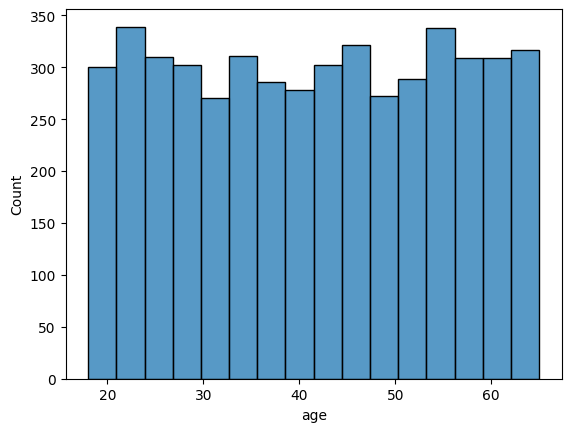

In [37]:
sns.histplot(df['age'])

<Axes: xlabel='checkout_status', ylabel='Count'>

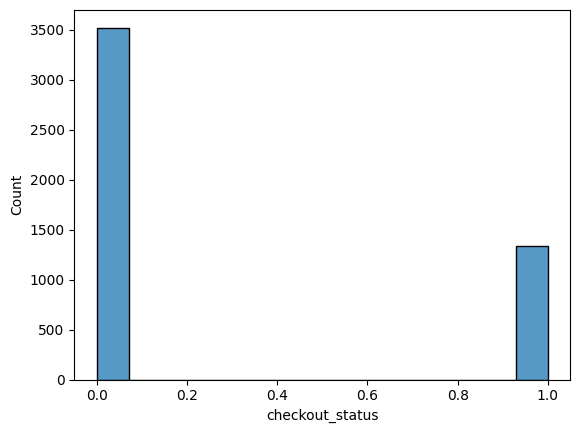

In [40]:
sns.histplot(df['checkout_status'])

<Axes: xlabel='pages_visited', ylabel='Count'>

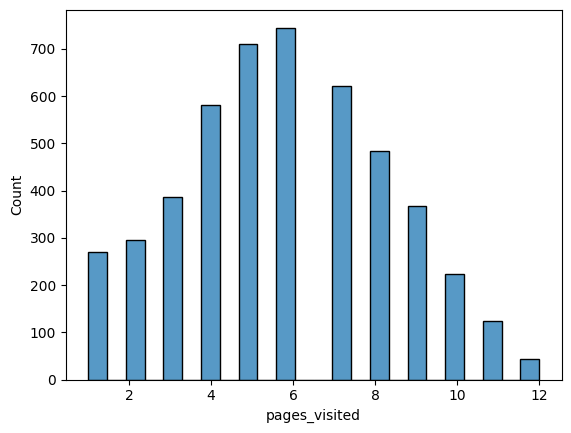

In [79]:
sns.histplot(df['pages_visited'])

In [69]:
print(stats.skew(df['pages_visited']))
print(stats.kurtosis(df['pages_visited']))

0.08244954040242751
-0.5557659273643769


<Axes: xlabel='cart_items', ylabel='Count'>

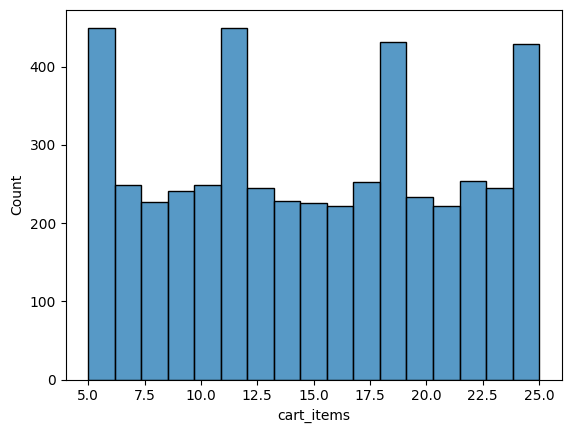

In [44]:
sns.histplot(df['cart_items'])

<Axes: xlabel='cart_value', ylabel='Count'>

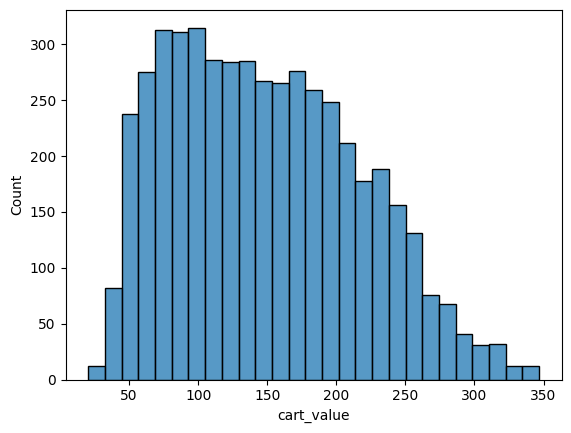

In [49]:
sns.histplot(df['cart_value'])

In [68]:
print(stats.skew(df['cart_value']))
print(stats.kurtosis(df['cart_value']))

0.389097599940022
-0.643321303351315


<Axes: xlabel='device', ylabel='Count'>

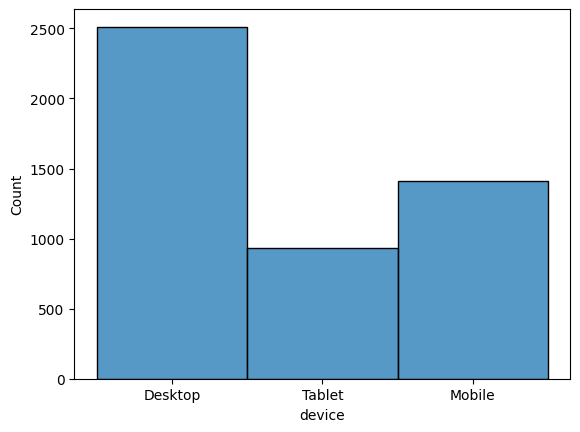

In [45]:
sns.histplot(df['device'])

<Axes: xlabel='location', ylabel='Count'>

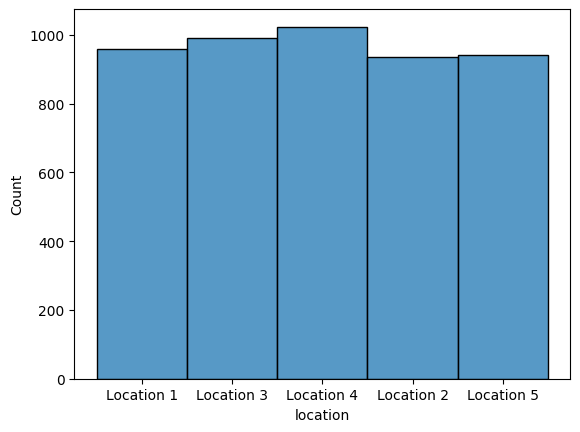

In [46]:
sns.histplot(df['location'])

<Axes: xlabel='device', ylabel='pages_visited'>

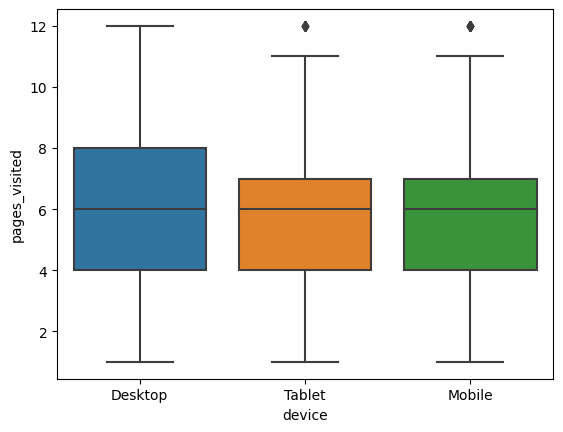

In [47]:
sns.boxplot(data = df, x = 'device', y= "pages_visited")

<Axes: xlabel='device', ylabel='cart_items'>

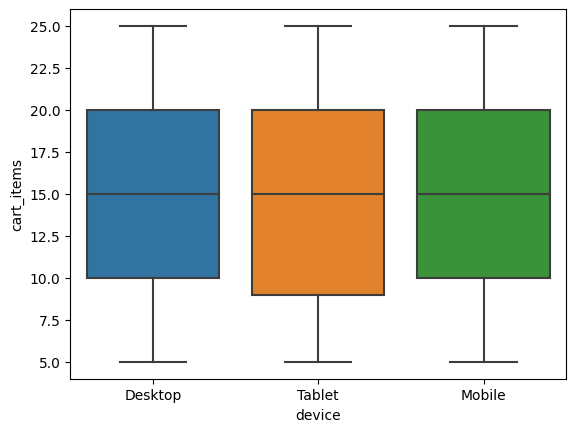

In [48]:
sns.boxplot(data = df, x = 'device', y= "cart_items")

In [51]:
desktop_data = df[df['device']=='Desktop']
tablet_data = df[df['device']=='Tablet']
mobile_data = df[df['device']=='Mobile']


In [64]:
desktop_data.describe()

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,41.329618,5.106290,25.398507,5.849522,14.869825,148.717178,0.286624
std,14.096570,2.577869,9.725817,2.577135,5.982932,67.334600,0.452274
min,18.000000,1.000000,1.000000,1.000000,5.000000,28.110000,0.000000
25%,29.000000,3.000000,18.584363,4.000000,10.000000,93.355000,0.000000
50%,41.000000,5.000000,25.371297,6.000000,15.000000,142.670000,0.000000
75%,54.000000,7.000000,32.179594,8.000000,20.000000,196.890000,1.000000
max,65.000000,9.000000,45.000000,12.000000,25.000000,346.810000,1.000000


In [65]:
tablet_data.describe()

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,41.900000,4.887097,25.115400,5.735484,14.898925,146.935742,0.255914
std,14.188402,2.626589,9.450471,2.527551,6.186942,69.673743,0.436609
min,18.000000,1.000000,1.000000,1.000000,5.000000,29.790000,0.000000
25%,29.000000,3.000000,18.655225,4.000000,9.000000,87.210000,0.000000
50%,43.000000,5.000000,25.093024,6.000000,15.000000,140.705000,0.000000
75%,54.000000,7.000000,31.850811,7.000000,20.000000,197.505000,1.000000
max,65.000000,9.000000,45.000000,12.000000,25.000000,344.430000,1.000000


In [66]:
mobile_data.describe()

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000
mean,41.742027,4.968108,24.640497,5.662651,15.104890,150.199391,0.265060
std,13.867767,2.587691,9.638916,2.556236,6.052517,67.538072,0.441522
min,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,30.000000,3.000000,17.898746,4.000000,10.000000,93.370000,0.000000
50%,42.000000,5.000000,24.341849,6.000000,15.000000,144.610000,0.000000
75%,54.000000,7.000000,31.510239,7.000000,20.000000,201.220000,1.000000
max,65.000000,9.000000,45.000000,12.000000,25.000000,345.230000,1.000000


<Axes: xlabel='age'>

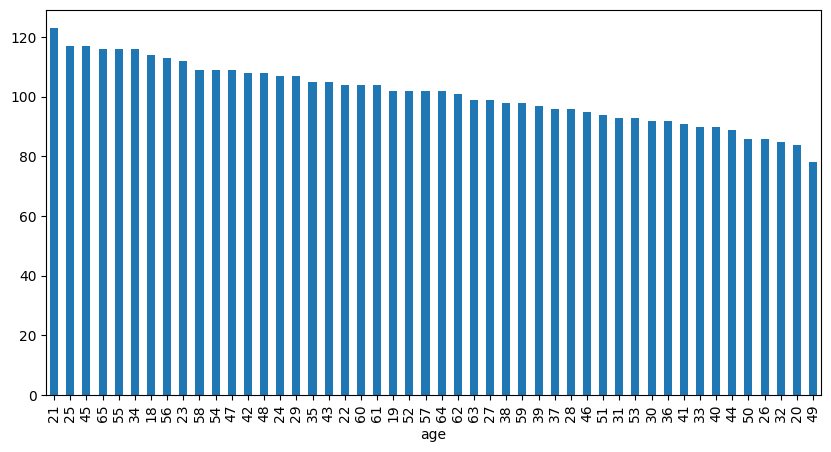

In [95]:
df.groupby('age')['cart_items'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='location'>

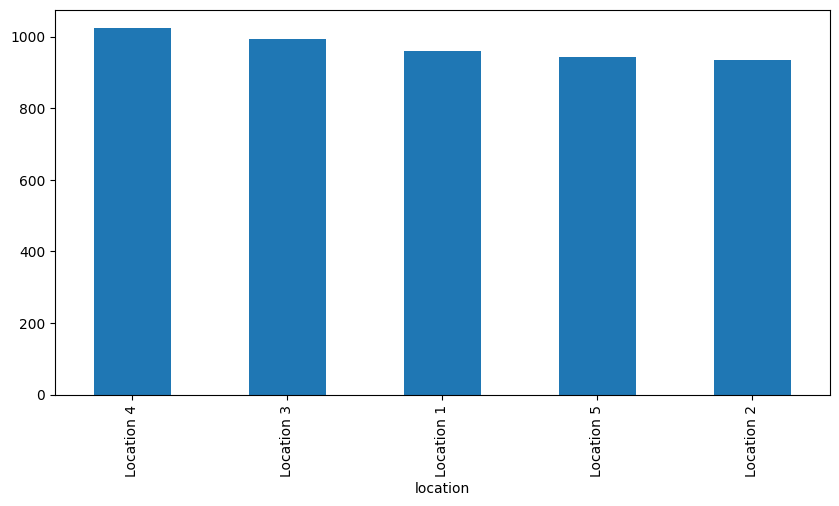

In [82]:
df.groupby('location')['time_spent'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [83]:
loc1 = df[df['location']=='Location 1']
loc2 = df[df['location']=='Location 2']
loc3 = df[df['location']=='Location 3']
loc4 = df[df['location']=='Location 4']
loc5 = df[df['location']=='Location 5']

In [85]:
loc1.describe()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,42.412500,25.553310,5.834375,15.150000,152.023948,0.282292
std,13.956459,9.522953,2.559137,5.911795,67.566207,0.450349
min,18.000000,1.000000,1.000000,5.000000,29.790000,0.000000
25%,31.000000,19.102754,4.000000,10.000000,95.490000,0.000000
50%,42.000000,25.529515,6.000000,15.000000,150.295000,0.000000
75%,55.000000,32.158695,8.000000,20.000000,198.887500,1.000000
max,65.000000,45.000000,12.000000,25.000000,344.480000,1.000000


In [87]:
loc2.describe()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,41.566845,24.974108,5.754011,15.003209,149.009594,0.267380
std,14.285689,9.675950,2.585875,6.111998,68.762915,0.442829
min,18.000000,5.000000,1.000000,5.000000,29.920000,0.000000
25%,29.000000,18.039205,4.000000,10.000000,92.635000,0.000000
50%,42.000000,25.071911,6.000000,15.000000,141.050000,0.000000
75%,54.000000,32.030316,8.000000,21.000000,198.885000,1.000000
max,65.000000,45.000000,12.000000,25.000000,344.430000,1.000000


In [88]:
loc3.describe()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,41.828629,24.866157,5.699597,14.832661,146.234385,0.267137
std,13.913197,9.874836,2.556817,6.052763,67.523516,0.442688
min,18.000000,1.000000,1.000000,5.000000,28.110000,0.000000
25%,29.000000,18.017206,4.000000,10.000000,92.547500,0.000000
50%,42.000000,24.832682,6.000000,15.000000,139.210000,0.000000
75%,55.000000,32.184154,8.000000,20.000000,194.302500,1.000000
max,65.000000,45.000000,12.000000,25.000000,346.810000,1.000000


In [89]:
loc4.describe()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,40.937500,25.054503,5.776367,14.758789,147.085977,0.284180
std,13.907248,9.402516,2.528390,6.051701,67.888375,0.451243
min,18.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,29.000000,18.228058,4.000000,9.750000,89.747500,0.000000
50%,40.500000,24.842351,6.000000,14.000000,139.375000,0.000000
75%,53.000000,31.762299,7.000000,20.000000,199.162500,1.000000
max,65.000000,45.000000,12.000000,25.000000,344.840000,1.000000


In [90]:
loc5.describe()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,41.072187,25.181640,5.804671,14.992569,149.906178,0.270701
std,14.170103,9.793257,2.588304,6.087822,67.471898,0.444558
min,18.000000,1.000000,1.000000,5.000000,25.840000,0.000000
25%,29.000000,18.716564,4.000000,10.000000,92.542500,0.000000
50%,41.500000,24.840555,6.000000,15.000000,145.085000,0.000000
75%,54.000000,31.774512,7.000000,20.000000,198.447500,1.000000
max,65.000000,45.000000,12.000000,25.000000,345.230000,1.000000


In [96]:
df.groupby('device')['cart_value'].mean().sort_values(ascending=False)

device
Mobile     150.199391
Desktop    148.717178
Tablet     146.935742
Name: cart_value, dtype: float64

<Axes: xlabel='age'>

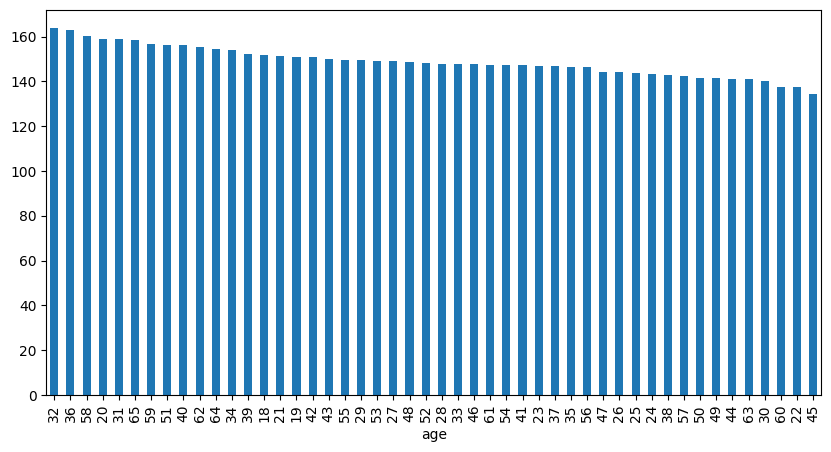

In [97]:
df.groupby('age')['cart_value'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='age'>

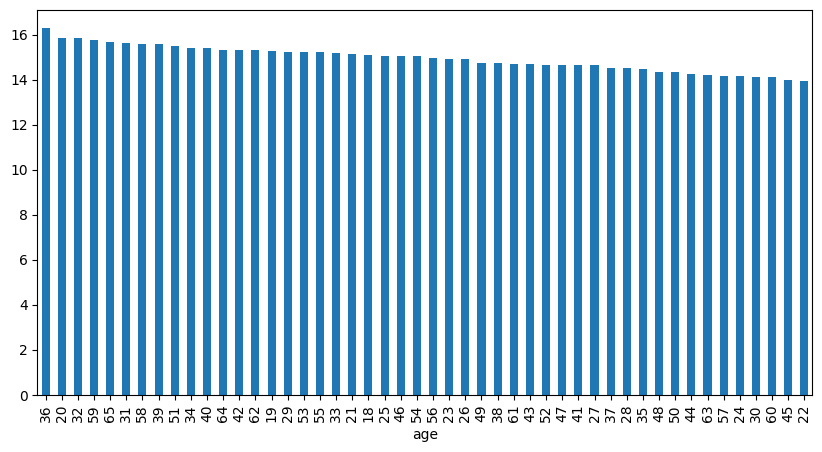

In [98]:
df.groupby('age')['cart_items'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

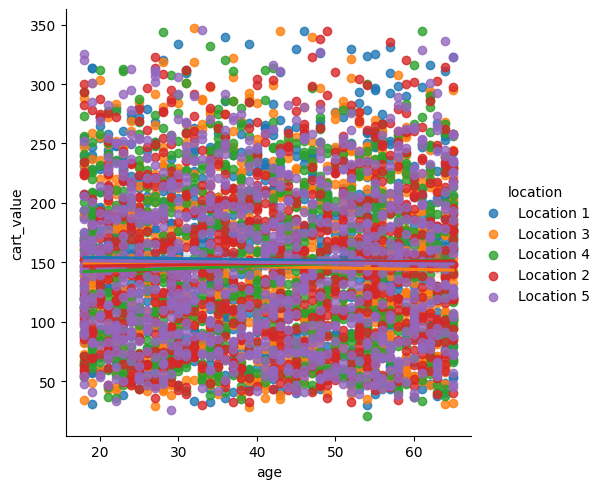

In [101]:
sns.lmplot(data = df, x='age', y='cart_value', hue = 'location')

In [102]:
checkout = df[df['checkout_status']== 1]
no_checkout = df[df['checkout_status']== 0]


In [112]:
checkout.describe()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.0
mean,41.234985,31.318157,7.289790,14.096847,140.510871,1.0
std,14.227291,4.178320,1.507841,3.735881,47.683980,0.0
min,18.000000,25.000659,2.000000,8.000000,43.220000,1.0
25%,28.000000,27.606351,6.000000,11.000000,102.810000,1.0
50%,41.000000,30.943031,7.000000,14.000000,135.830000,1.0
75%,54.000000,34.539573,8.000000,17.000000,174.365000,1.0
max,65.000000,39.966537,12.000000,20.000000,313.760000,1.0


In [104]:
no_checkout.describe()

,age,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.0
mean,41.681341,22.780553,5.199659,15.264130,151.945087,0.0
std,13.978783,10.089527,2.644175,6.683901,73.815183,0.0
min,18.000000,1.000000,1.000000,5.000000,20.410000,0.0
25%,29.000000,16.011918,3.000000,9.000000,85.550000,0.0
50%,42.000000,21.637069,5.000000,15.000000,146.810000,0.0
75%,54.000000,28.396519,7.000000,22.000000,209.410000,0.0
max,65.000000,45.000000,12.000000,25.000000,346.810000,0.0


<Axes: xlabel='location', ylabel='Count'>

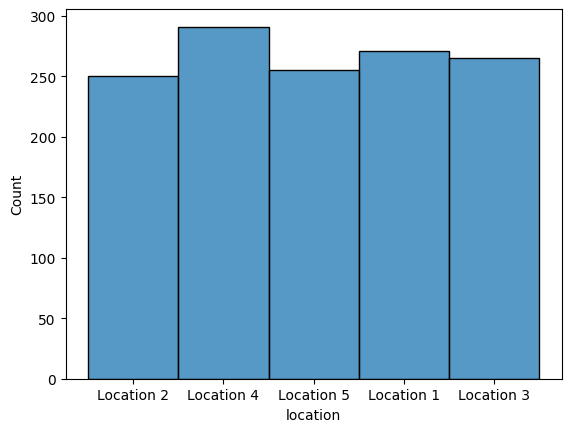

In [105]:
sns.histplot(checkout['location'])

<Axes: xlabel='location', ylabel='Count'>

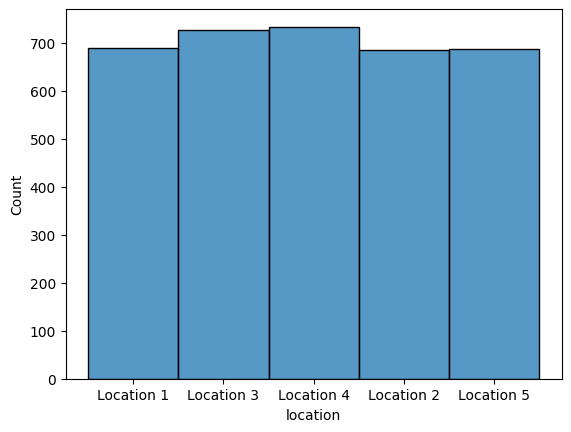

In [107]:
sns.histplot(no_checkout['location'])

<Axes: xlabel='age', ylabel='Count'>

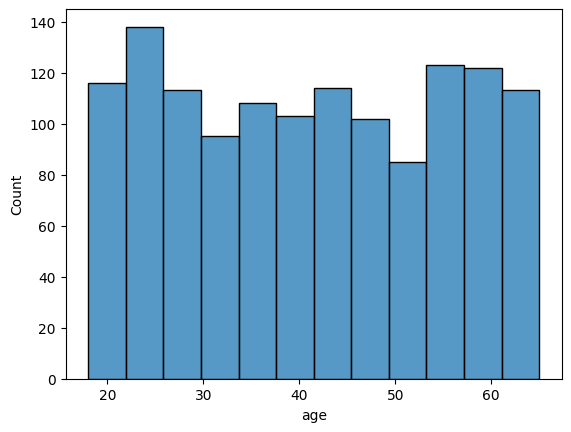

In [109]:
sns.histplot(checkout['age'])

<Axes: xlabel='age', ylabel='Count'>

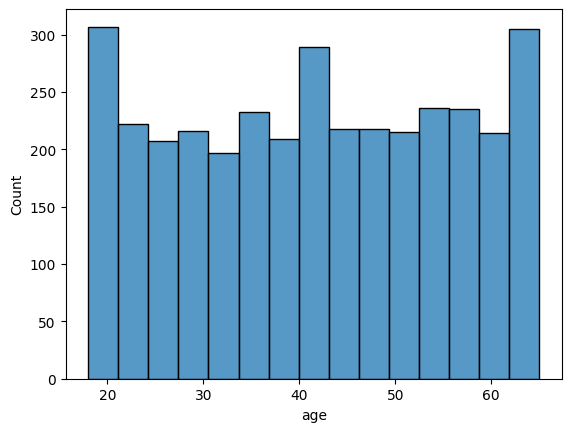

In [110]:
sns.histplot(no_checkout['age'])

Question 1: \
Based on my research, the main differences between those who checked out and those who did not check out were time spent, pages visited, cart items and cart value. checkout users generally spent more time browsing than those who did not check out, both in terms of mean and medium. 10 minutes of browsing (from about 20 minutes to 30 minutes). Checkout customers also browse more pages, about 2 pages (from 5 to 7 pages). Checkout customers generally had about 1 less item in their shopping cart than non-checkout customers (14 vs. 15 items), and the value was reduced from about $150 to about $140. From this, we can infer that checkout users are more purposeful in their use of the site, which means they spend more time shopping for the products they need with fewer items. Un-checkout users spend less time looking around and do not necessarily buy even after adding items to the cart. 

Question 2: \
I found that the device had 100 rows of missing data, and the location also had dozens of rows of missing data. But this is only 2% of the entire data, so I removed all of them to avoid errors when drawing the diagram. Secondly, I checked all the numerical data outliers, and I removed the rows corresponding to the extreme values of pages_visited and cart_value by using boxplot to avoid a large impact on other data when doing EDA. \
Then I did a visual analysis of the data, and I found that the age, cart_items, and location of the whole data tended to have a uniform distribution, but cart_value and pages_visited had right-skewness. and most people used computers. I also sorted the data according to location, device, and checkout status.

Question 3: \
Based on my plots, charts and numerical analysis, I found that users between 30 and 40 years old are the main users of the shopping site, and their main website device is desktop, which I presume is because they are financially well-off and skilled in using the web. Therefore, converting users between 30 and 40 years old who use desktop to browse the web but do not checkout into checkout users will be our next main goal. We can collect the composition and price range of their shopping carts, and analyze the different trends of male and female users, so that we can start from their usage habits and shopping preferences, and push products to these users that better meet their shopping needs. The goal of converting unchecked users into checked-out users is thus achieved. 
